In [22]:
import pandas as pd

df = pd.read_csv(r'D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\processed_arp_data_augmented.csv')
df

,timestamp,sender_mac,sender_ip,target_mac,target_ip,operation,label
0,1.737294e+09,00:ad:24:bf:9d:52,192.168.1.1,00:00:00:00:00:00,192.168.1.72,1,0
1,1.737294e+09,00:ad:24:bf:9d:52,192.168.1.1,00:00:00:00:00:00,192.168.1.72,1,0
2,1.737294e+09,00:ad:24:bf:9d:52,192.168.1.1,00:00:00:00:00:00,192.168.1.72,1,0
3,1.737294e+09,00:ad:24:bf:9d:52,192.168.1.1,00:00:00:00:00:00,192.168.1.15,1,0
4,1.737294e+09,00:ad:24:bf:9d:52,192.168.1.1,00:00:00:00:00:00,192.168.1.15,1,0
...,...,...,...,...,...,...,...
7161,1.727195e+09,08:00:27:b0:a0:0d,192.168.1.9,00:ad:24:bf:9d:52,192.168.1.104,2,1
7162,1.727195e+09,aa:4f:1f:f5:d7:35,192.168.1.47,a4:29:9c:ea:30:86,192.168.1.50,2,1
7163,1.727195e+09,5d:82:9a:e6:1c:52,192.168.1.9,3a:eb:7f:e8:bc:fa,192.168.1.63,2,1
7164,1.727195e+09,61:2e:4a:3f:7e:1d,192.168.1.244,5e:da:82:d8:7a:0d,192.168.1.186,2,1


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Преобразование MAC/IP в числовые признаки
for col in ['sender_mac', 'sender_ip', 'target_mac', 'target_ip']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Нормализация числовых признаков
scaler = StandardScaler()
df[['timestamp', 'operation']] = scaler.fit_transform(df[['timestamp', 'operation']])

# Создание последовательностей для временных моделей
def create_sequences(data, window_size=10):
    sequences = []
    for i in range(len(data)-window_size):
        seq = data[i:i+window_size]
        sequences.append(seq)
    return np.array(sequences)

window_size = 100
X = create_sequences(df.drop('label', axis=1).values, window_size)
y = df['label'][window_size:].values

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_lstm = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, epochs=15, batch_size=32, 
                             validation_split=0.2, verbose=1)

Epoch 1/15


c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9469 - loss: 0.1962 - val_accuracy: 0.9982 - val_loss: 0.0124
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9988 - loss: 0.0084 - val_accuracy: 0.9991 - val_loss: 0.0058
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9991 - val_loss: 0.0027
Epoch 5/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9991 - val_loss: 0.0031
Epoch 6/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9991 - val_loss: 0.0028
Epoch 7/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9977 - loss: 0.0048 - val_accuracy: 0.9991 - val_loss: 0.0030
Epoch 8/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9988 - loss: 0.0032 - val_accuracy: 0.999

In [25]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    GRU(32),
    Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_gru = model_gru.fit(X_train, y_train, epochs=15, batch_size=32,
                           validation_split=0.2, verbose=1)

Epoch 1/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9528 - loss: 0.1355 - val_accuracy: 0.9991 - val_loss: 0.0072
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9987 - loss: 0.0081 - val_accuracy: 0.9991 - val_loss: 0.0061
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9991 - val_loss: 0.0032
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9991 - val_loss: 0.0028
Epoch 5/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9991 - val_loss: 0.0031
Epoch 6/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9993 - loss: 0.0014 - val_accuracy: 0.9991 - val_loss: 0.0027
Epoch 7/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9993 - loss: 0.0013 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 8/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 1.0000 - loss: 4.9750e-04 - val_

In [26]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(2),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train, y_train, epochs=15, batch_size=32,
                           validation_split=0.2, verbose=1)

Epoch 1/15


c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9311 - loss: 2.8174 - val_accuracy: 0.9867 - val_loss: 0.2473
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0616 - val_accuracy: 0.9973 - val_loss: 0.0649
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0223 - val_accuracy: 0.9973 - val_loss: 0.0267
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9956 - val_loss: 0.0281
Epoch 5/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9630e-04 - val_accuracy: 0.9956 - val_loss: 0.0240
Epoch 6/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5468e-06 - val_accuracy: 0.9956 - val_loss: 0.0238
Epoch 7/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.2810e-06 - val_accuracy: 0.9956 - val_loss: 0.0243
Epoch 8/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.5869e-06 - val_accurac

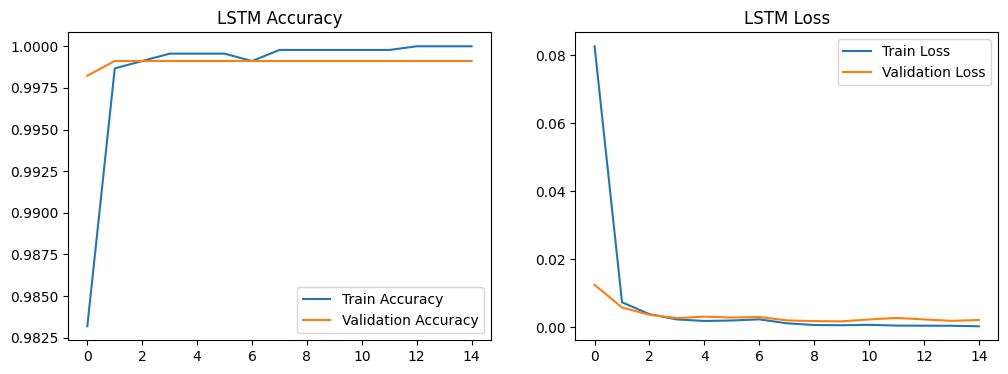

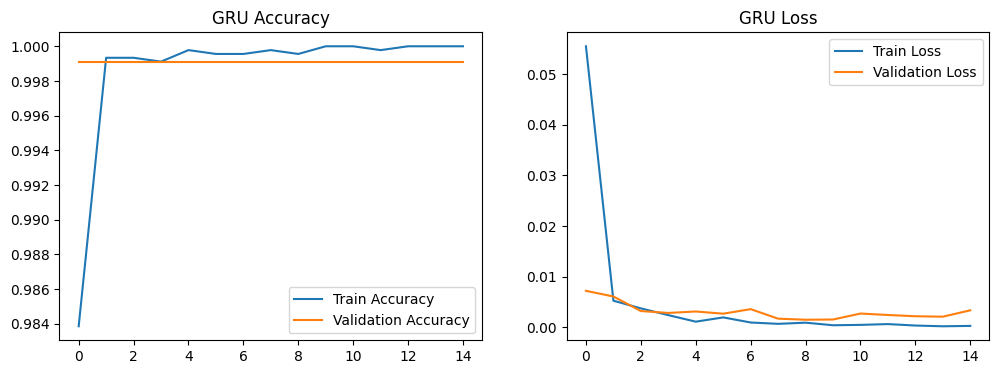

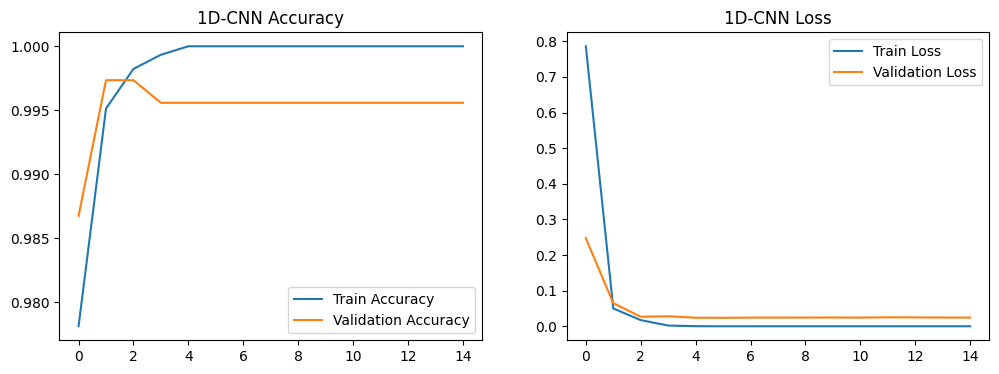

LSTM Evaluation:
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       542

    accuracy                           1.00      1414
   macro avg       1.00      1.00      1.00      1414
weighted avg       1.00      1.00      1.00      1414



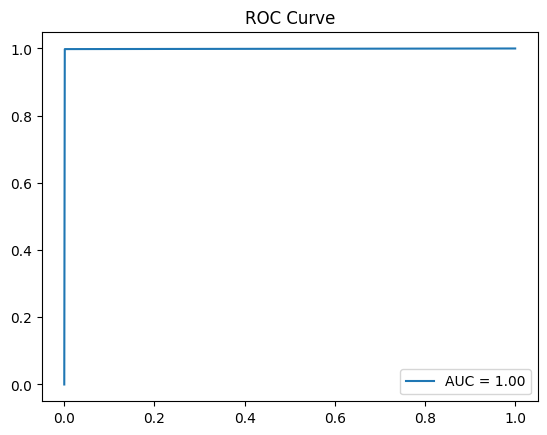

GRU Evaluation:
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       1.00      1.00      1.00       542

    accuracy                           1.00      1414
   macro avg       1.00      1.00      1.00      1414
weighted avg       1.00      1.00      1.00      1414



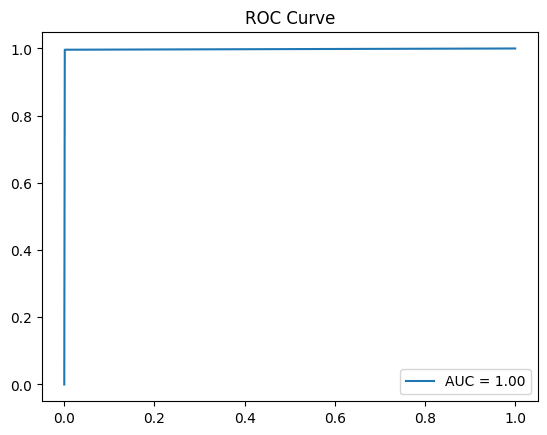

1D-CNN Evaluation:
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       0.99      0.99      0.99       542

    accuracy                           1.00      1414
   macro avg       0.99      0.99      0.99      1414
weighted avg       1.00      1.00      1.00      1414



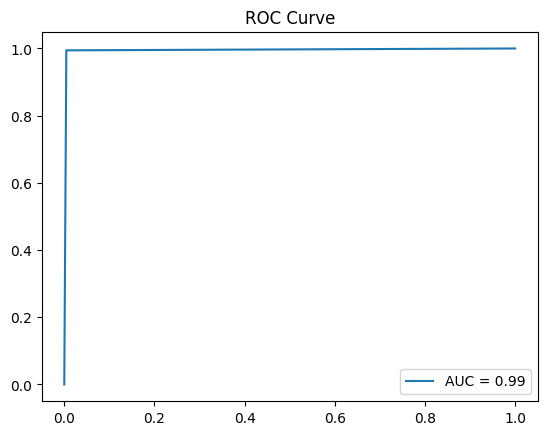

In [27]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_history(history_lstm, "LSTM")
plot_history(history_gru, "GRU")
plot_history(history_cnn, "1D-CNN")
from sklearn.metrics import classification_report, roc_curve, auc

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test).round()
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

print("LSTM Evaluation:")
evaluate_model(model_lstm, X_test, y_test)

print("GRU Evaluation:")
evaluate_model(model_gru, X_test, y_test)

print("1D-CNN Evaluation:")
evaluate_model(model_cnn, X_test, y_test)